>
# European Nations Energy Consumption Analysis
>
>

![](https://www.maxpixel.net/static/photo/1x/European-Commission-Flag-Brussels-Europe-Policy-4056171.jpg)

>
Energy plays a significant role in the lives of individuals and the operations of the economy as a measure of both economic and social progress, as well as a fundamental humanitarian necessity. As a result, a country's energy consumption per capita is seen as a key measure of economic progress. Energy is not only seen as a production input in today's world, but also as a strategic commodity that serves as the foundation for international relations and impacts the global economy and politics.

Depending on their rising economies and evolving socio-economic systems, countries' energy consumption are increasing every day. Their failure to boost energy generation while rising energy use has resulted in an energy deficit, which is a serious concern. If an economy runs out of energy resources, it can either accept "poor economic growth with current energy resources" or try to "boost growth by supplying the uncovered portion of energy demand through imports."

As a weekend project I am be conducting EDA, Statistical Analysis, and Visualizations implementing python libraries such as Pandas, NumPy, Matplotlib and Seaborn.

## Downloading the Dataset

This dataset is a collection of key metrics maintained by [Our World in Data](https://ourworldindata.org/energy). It is updated regularly and includes data on energy consumption (primary energy, per capita, and growth rates), energy mix, electricity mix and other relevant metrics.

The full information on the data set can be found at [Kaggle](https://www.kaggle.com/pralabhpoudel/world-energy-consumption)

The decriptions for each columns can be found [here](https://github.com/owid/energy-data/blob/master/owid-energy-codebook.csv)


In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/pralabhpoudel/world-energy-consumption' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./world-energy-consumption" (use force=True to force download)


The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './world-energy-consumption'

In [ ]:
import os
os.rename(r'./world-energy-consumption/World Energy Consumption.csv',r'./world-energy-consumption/world-energy-consumption-europe.csv')
os.listdir(data_dir)

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "energy-consumption-europe-eda" # change this (use lowercase letters and hyphens only)

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

<IPython.core.display.Javascript object>

In [60]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ranton95/energy-consumption-europe-eda" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ranton95/energy-consumption-europe-eda


'https://jovian.ai/ranton95/energy-consumption-europe-eda'

## Data Preparation and Cleaning

To further study the sample data set, the data is loaded into the Pandas dataframe to explore the energy relations and the variables. Furthermore, a subset of datasets has been generated to study specific data samples:



#### Loading the dataset:

In [80]:
import pandas as pd
import numpy as np

In [81]:
energy_df = pd.read_csv('world-energy-consumption/world-energy-consumption-europe.csv')
#Filterinng out European Nations as a list
countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 
             'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 
             'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
             'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']
energy_df = energy_df.loc[energy_df['country'].isin(countries)]

In [82]:
energy_df.head()

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
1039,AUT,Austria,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.864771e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1040,AUT,Austria,1901,5.607,9.674,NaN,0.0,NaN,0.000,NaN,...,NaN,NaN,1.872057e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1041,AUT,Austria,1902,-3.808,-6.937,NaN,0.0,NaN,0.012,NaN,...,NaN,NaN,1.945581e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1042,AUT,Austria,1903,2.144,3.757,NaN,0.0,0.0,0.000,NaN,...,NaN,NaN,1.963850e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1043,AUT,Austria,1904,1.317,2.357,NaN,0.0,0.0,0.000,NaN,...,NaN,NaN,1.994206e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Exploring the dataset of rows & columns, ranges of values:

In [83]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2432 entries, 1039 to 14909
Columns: 122 entries, iso_code to wind_energy_per_capita
dtypes: float64(119), int64(1), object(2)
memory usage: 2.3+ MB


In [84]:
energy_df.describe()

,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
count,2432.000000,1879.000000,1364.000000,832.000000,1226.000000,1101.000000,1025.000000,1330.000000,1330.000000,567.000000,...,947.000000,1320.000000,2.174000e+03,947.000000,622.000000,1320.000000,1294.000000,1320.000000,947.000000,1320.000000
mean,1967.495888,23.603280,-0.158705,11.652290,0.125091,12.180569,0.340348,1.313317,5.244126,3.955945,...,38.842141,56.127548,2.575236e+11,3.423313,67.466450,0.819273,0.701532,6.131657,194.852859,316.853905
std,35.159506,904.510404,45.756945,123.244171,14.055987,117.380748,3.678435,6.084897,36.962487,4.565639,...,93.893444,177.799763,4.965430e+11,7.266099,376.077716,2.214428,3.386885,23.202368,406.921654,825.856239
min,1900.000000,-100.000000,-1001.975000,-77.593000,-145.139000,-100.000000,-20.329000,-38.874000,-259.139000,0.000000,...,0.000000,0.000000,3.243604e+09,0.000000,-100.000000,0.000000,-10.409000,0.000000,0.000000,0.000000
25%,1937.750000,-1.131000,-0.894000,0.000000,0.000000,0.000000,0.000000,-1.577750,-3.949500,0.592500,...,0.000000,0.000000,2.799428e+10,0.000000,4.925500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1973.000000,0.000000,0.057000,0.000000,0.000000,0.000000,0.000000,1.224500,1.965500,2.227000,...,0.070000,0.000000,9.023307e+10,0.116000,22.082000,0.000000,0.000000,0.000000,8.001000,0.000000
75%,1998.000000,4.576000,2.376500,5.153000,0.071000,3.550000,0.198000,4.493500,13.664750,6.084500,...,9.896500,0.906750,2.240000e+11,3.195500,51.309500,0.338500,0.115000,1.035250,194.733500,151.683500
max,2020.000000,39189.858000,484.809000,3322.617000,128.611000,2900.000000,36.776000,46.429000,252.527000,22.719000,...,608.709000,1408.845000,3.920000e+12,56.338000,8554.460000,20.660000,63.240000,311.942000,2825.425000,6928.363000


In [85]:
energy_df.columns

Index(['iso_code', 'country', 'year', 'coal_prod_change_pct',
       'coal_prod_change_twh', 'gas_prod_change_pct', 'gas_prod_change_twh',
       'oil_prod_change_pct', 'oil_prod_change_twh', 'energy_cons_change_pct',
       ...
       'solar_elec_per_capita', 'solar_energy_per_capita', 'gdp',
       'wind_share_elec', 'wind_cons_change_pct', 'wind_share_energy',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_energy_per_capita'],
      dtype='object', length=122)

The above dataframe retrived has a lot of empty cells with NaN values which we will have to handle. We can usea for loop iteration to replace the NaN values wherever it is meaningful. However, we should also keep in mind that we cannot replace NaN values with 0 for the GDP column as it would not make sense.

#### Removing the NaN and Cleaning the data using For loop iteration:

In [86]:
nans = energy_df.isna().sum()
nans

iso_code                     0
country                      0
year                         0
coal_prod_change_pct       553
coal_prod_change_twh      1068
                          ... 
wind_share_energy         1112
wind_cons_change_twh      1138
wind_consumption          1112
wind_elec_per_capita      1485
wind_energy_per_capita    1112
Length: 122, dtype: int64

In [87]:
for nan in nans.index:
    if nans[nan]>0:
        energy_df[nan].ffill(inplace=True)
        energy_df[nan].bfill(inplace=True)

energy_df

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
1039,AUT,Austria,1900,5.607,9.674,15.217,0.0,0.0,0.000,4.610,...,0.000,0.000,1.864771e+10,0.000,400.000,0.000,0.000,0.000,0.000,0.000
1040,AUT,Austria,1901,5.607,9.674,15.217,0.0,0.0,0.000,4.610,...,0.000,0.000,1.872057e+10,0.000,400.000,0.000,0.000,0.000,0.000,0.000
1041,AUT,Austria,1902,-3.808,-6.937,15.217,0.0,0.0,0.012,4.610,...,0.000,0.000,1.945581e+10,0.000,400.000,0.000,0.000,0.000,0.000,0.000
1042,AUT,Austria,1903,2.144,3.757,15.217,0.0,0.0,0.000,4.610,...,0.000,0.000,1.963850e+10,0.000,400.000,0.000,0.000,0.000,0.000,0.000
1043,AUT,Austria,1904,1.317,2.357,15.217,0.0,0.0,0.000,4.610,...,0.000,0.000,1.994206e+10,0.000,400.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14905,SWE,Sweden,2016,0.000,-0.113,0.000,0.0,0.0,0.023,-1.587,...,14.538,36.561,4.400000e+11,9.929,-5.413,6.544,-2.228,38.927,1573.709,3957.555
14906,SWE,Sweden,2017,0.000,-0.113,0.000,0.0,0.0,0.023,3.199,...,23.221,58.052,4.400000e+11,10.722,13.091,7.171,5.096,44.023,1777.789,4444.476
14907,SWE,Sweden,2018,0.000,-0.113,0.000,0.0,0.0,0.023,-1.970,...,40.814,97.451,4.400000e+11,10.176,-6.151,6.865,-2.708,41.315,1666.968,4143.051
14908,SWE,Sweden,2019,0.000,-0.113,0.000,0.0,0.0,0.023,3.470,...,40.554,144.768,4.400000e+11,11.676,19.170,7.907,7.920,49.234,1984.843,4905.770


### Generation sub-data sets for study:

The main enerygy_df is subdivided into two major datasets:

**1. total_country_study_df:** To study the relations between the EU nations for each energy source.


**2. total_year_study_df:** To study the relations between the period 2000-2020

**3. pop_gdp_df:** For GDP and population comparisons

to study the total energy consumption based on the electricity generated type: 

#### Classification based on the country:

In [19]:
total_country_study_df = energy_df.groupby('country')[['coal_electricity','oil_electricity','gas_electricity','hydro_electricity','nuclear_electricity','wind_electricity','solar_electricity']].sum().reset_index()
total_country_study_df.head()

,country,coal_electricity,oil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,wind_electricity,solar_electricity
0,Austria,671.171,353.691,997.759,3957.369,0.000,61.432,9.575
1,Belgium,174.601,407.246,1525.050,3656.813,1540.445,648.323,138.998
2,Bulgaria,431.130,365.496,2647.579,132.448,3444.255,1067.351,403.948
3,Croatia,178.673,28.420,69.196,195.194,0.000,9.431,0.483
4,Cyprus,43.400,93.305,115.115,111.520,0.000,33.424,2.824


#### Classification based on years:

A dataset to study the total year energy consumption by complete European nations between the year 2000 & 2020: 

In [46]:
total_year_study_df = energy_df.groupby(['year'])[['coal_electricity','oil_electricity','gas_electricity','hydro_electricity','nuclear_electricity','wind_electricity','solar_electricity']].sum().reset_index()
total_year_study_df.drop(index=total_year_study_df.index[:100], axis=0,inplace=True)
total_year_study_df.head()

,year,coal_electricity,oil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,wind_electricity,solar_electricity
100,2000,795.053,235.089,328.209,354.934,859.924,21.424,0.093
101,2001,792.372,234.124,351.390,375.524,888.887,25.782,0.165
102,2002,807.352,246.301,374.571,314.700,902.306,35.006,0.278
103,2003,849.114,231.343,419.225,305.627,907.214,43.420,0.402
104,2004,835.444,208.173,460.259,324.077,928.473,57.607,0.733


#### Classification based on the country GDP & Population:

A dataset extracted to study the gdp and population of each EU nations:

In [49]:
pop_gdp_df = energy_df.groupby(['iso_code','country','year'])[['country','gdp','population']].sum().reset_index()
pop_gdp_df


,iso_code,country,year,gdp,population
0,AUT,Austria,1900,1.864771e+10,5979721.0
1,AUT,Austria,1901,1.872057e+10,6041260.0
2,AUT,Austria,1902,1.945581e+10,6101911.0
3,AUT,Austria,1903,1.963850e+10,6164683.0
4,AUT,Austria,1904,1.994206e+10,6228010.0
...,...,...,...,...,...
2427,SWE,Sweden,2016,4.400000e+11,9836000.0
2428,SWE,Sweden,2017,4.400000e+11,9905000.0
2429,SWE,Sweden,2018,4.400000e+11,9972000.0
2430,SWE,Sweden,2019,4.400000e+11,10036000.0


**Calculating Real GDP per capita:**
GDP per capita is gross domestic product divided by midyear population.

In [50]:
pop_gdp_df['real_gdp'] =pop_gdp_df['gdp']/pop_gdp_df['population']

pop_gdp_df.head()

,iso_code,country,year,gdp,population,real_gdp
0,AUT,Austria,1900,1.864771e+10,5979721.0,3118.490913
1,AUT,Austria,1901,1.872057e+10,6041260.0,3098.785575
2,AUT,Austria,1902,1.945581e+10,6101911.0,3188.478091
3,AUT,Austria,1903,1.963850e+10,6164683.0,3185.646922
4,AUT,Austria,1904,1.994206e+10,6228010.0,3201.994848


In [51]:
import jovian

In [143]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ranton95/energy-consumption-europe-eda" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ranton95/energy-consumption-europe-eda


'https://jovian.ai/ranton95/energy-consumption-europe-eda'

## Exploratory Analysis and Visualization

In order to make energy a controlled and accounted for cost across nations, an effective energy management strategy based on the analysis of energy data is crucial. With the dataset found on Kaggle, we can explore some of the key analysis that can be conducted to validate the data and visualize it:



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [26]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (35, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

>
>
### Comparison of Real GDP across EU Nations:
>
>

As the data set has not been verified, there has been inconsistencies to the real world dataset. However, we can notice that Slovakia has a different range compared to the current world data set available. This dataset is for the average relation for the period until 2020:

<AxesSubplot:xlabel='country', ylabel='real_gdp'>

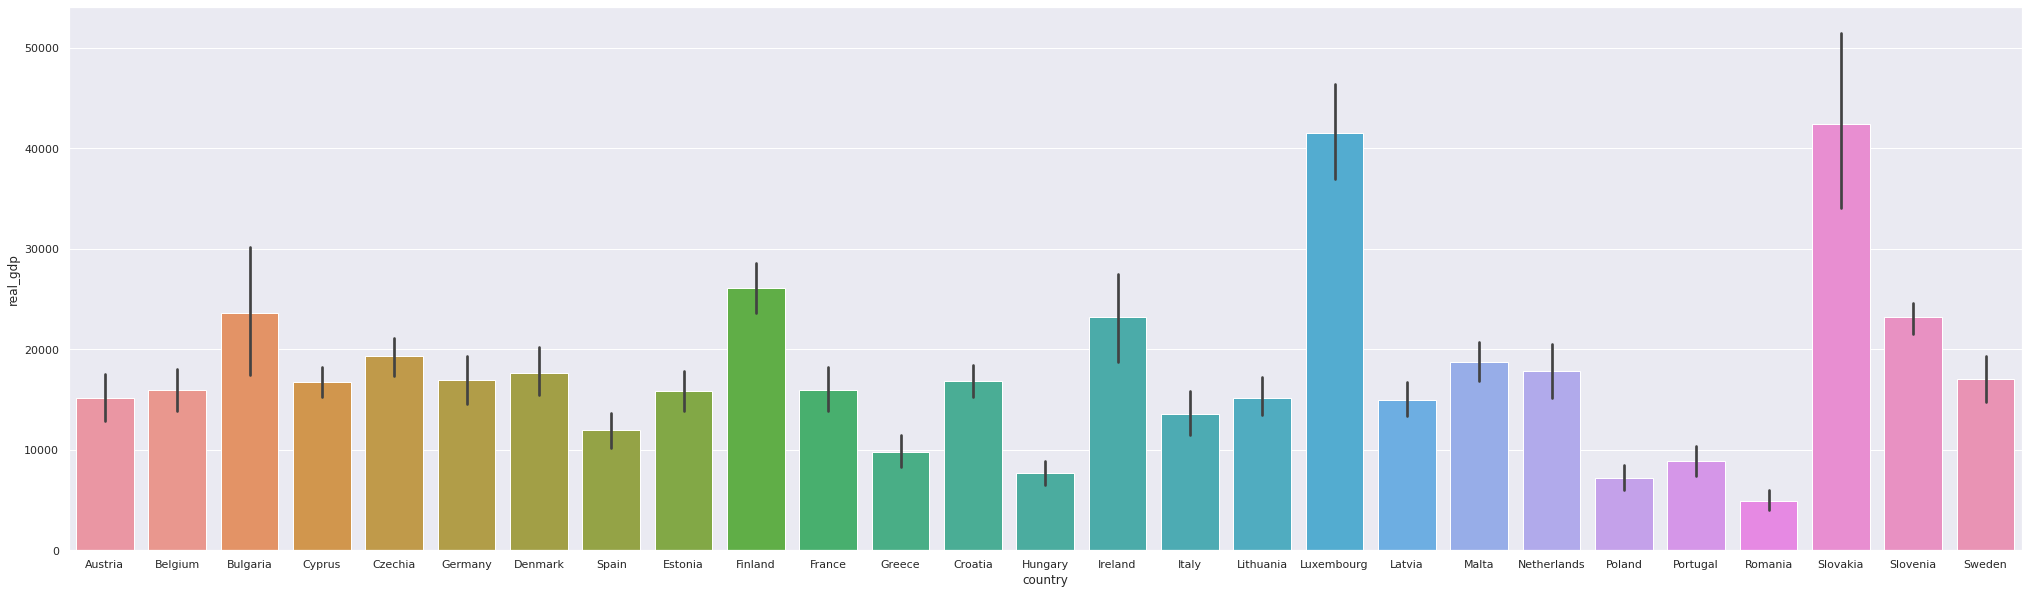

In [64]:
matplotlib.rcParams['figure.figsize'] = (35, 10)
sns.set(font_scale=1)
sns.barplot(x='country', y='real_gdp', data=pop_gdp_df)

The average estimated real GDP growth with variation factors from the data extracted between 1900-2020 for EU nations

>
>
### Enerygy source utilization and classification study between nations in the European Union:
>
>
Energy generated in the European Union and energy imported from other nations make up the total amount of energy accessible in the EU. The dominant sources of energy remains to be nuclear, followed by coal



In [28]:
total_country_study_df.head()

,country,coal_electricity,oil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,wind_electricity,solar_electricity
0,Austria,671.171,353.691,997.759,3957.369,0.000,61.432,9.575
1,Belgium,174.601,407.246,1525.050,3656.813,1540.445,648.323,138.998
2,Bulgaria,431.130,365.496,2647.579,132.448,3444.255,1067.351,403.948
3,Croatia,178.673,28.420,69.196,195.194,0.000,9.431,0.483
4,Cyprus,43.400,93.305,115.115,111.520,0.000,33.424,2.824


In [29]:
total_country_study_df.describe()

,coal_electricity,oil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,wind_electricity,solar_electricity
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,2082.152074,527.465704,1959.625074,1170.522407,2932.119889,1150.262111,389.833889
std,3772.992998,702.072767,2456.558813,1735.607622,7252.121020,2408.639002,907.418807
min,0.000000,0.762000,10.422000,0.441000,0.000000,0.044000,0.003000
25%,176.637000,103.842000,103.633500,73.634500,0.000000,21.965500,2.780000
50%,647.712000,268.754000,1179.600000,195.194000,346.460000,139.374000,89.255000
75%,1119.103000,580.922500,2016.864000,1617.648000,2046.795000,1085.368500,206.930000
max,14006.567000,2531.295000,9398.144000,5989.153000,35104.726000,11501.961000,4368.903000


Extracting the mean, standard deviation, count and other range of values using Pandas function

>
>
#### Plotting the relation between the energy source and the consuming nation:
>
>

We can notice that most of the nations still rely on Coal and Natural gas between the period of study.

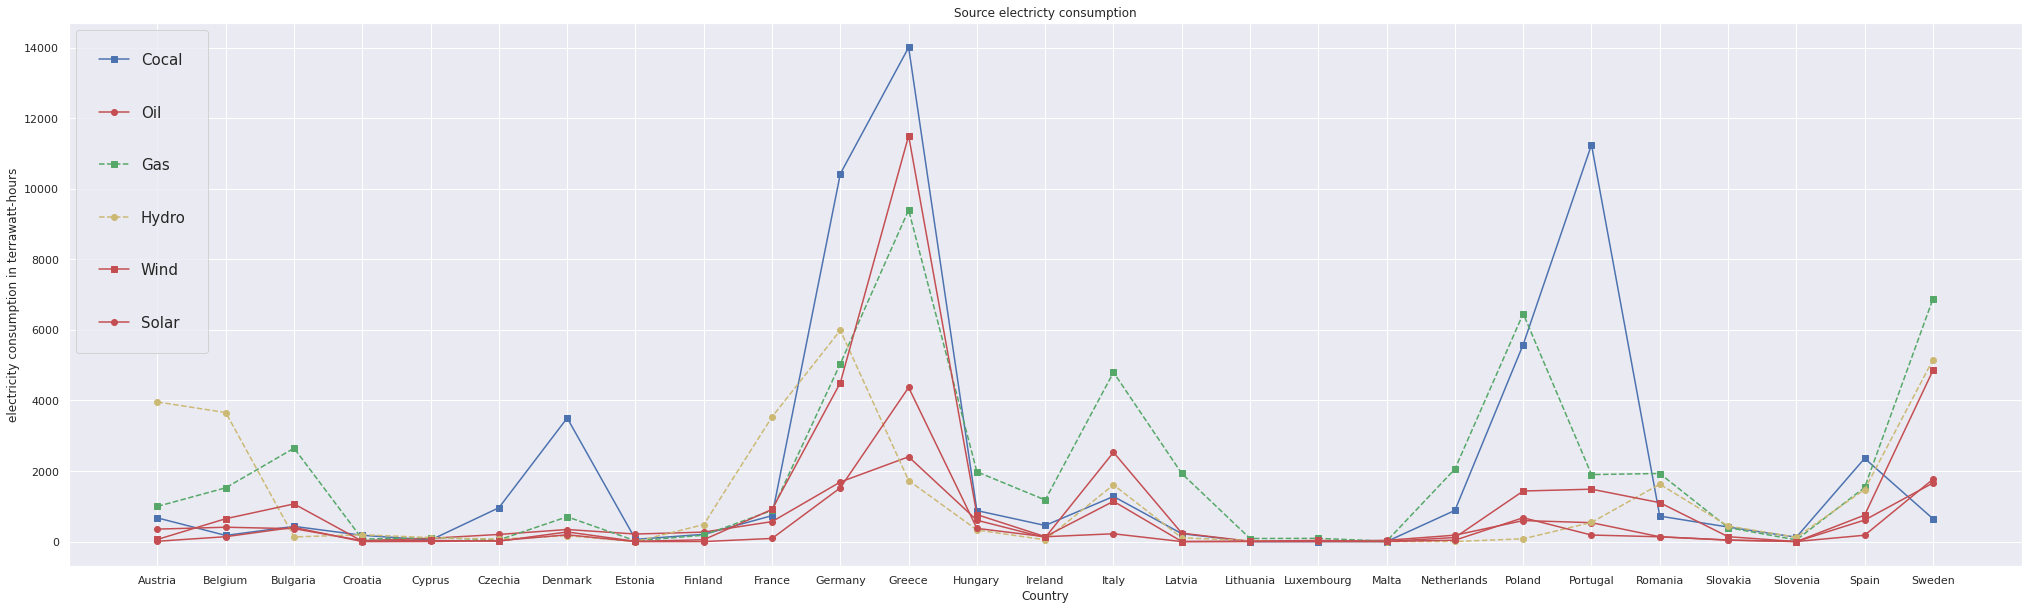

In [77]:

plt.plot(total_country_study_df.country, total_country_study_df.coal_electricity, 's-b')
plt.plot(total_country_study_df.country, total_country_study_df.oil_electricity, 'o-r')
plt.plot(total_country_study_df.country, total_country_study_df.gas_electricity, 's--g')
plt.plot(total_country_study_df.country, total_country_study_df.hydro_electricity, 'o--y')
plt.plot(total_country_study_df.country, total_country_study_df.wind_electricity, 's-r')
plt.plot(total_country_study_df.country, total_country_study_df.solar_electricity, 'o-r')


plt.xlabel('Country')
plt.ylabel('electricity consumption in terrawatt-hours')

plt.title('Source electricty consumption')
plt.legend(['Cocal','Oil','Gas','Hydro','Wind','Solar'],loc='upper left', borderpad=1.5, labelspacing=2.5, prop={'size':15})


>
>
### Visualization of major consumer nations above the mean for each energy source:
>
>

The below plot visualizes the major nations consuming the specific energy source above it's actual mean:

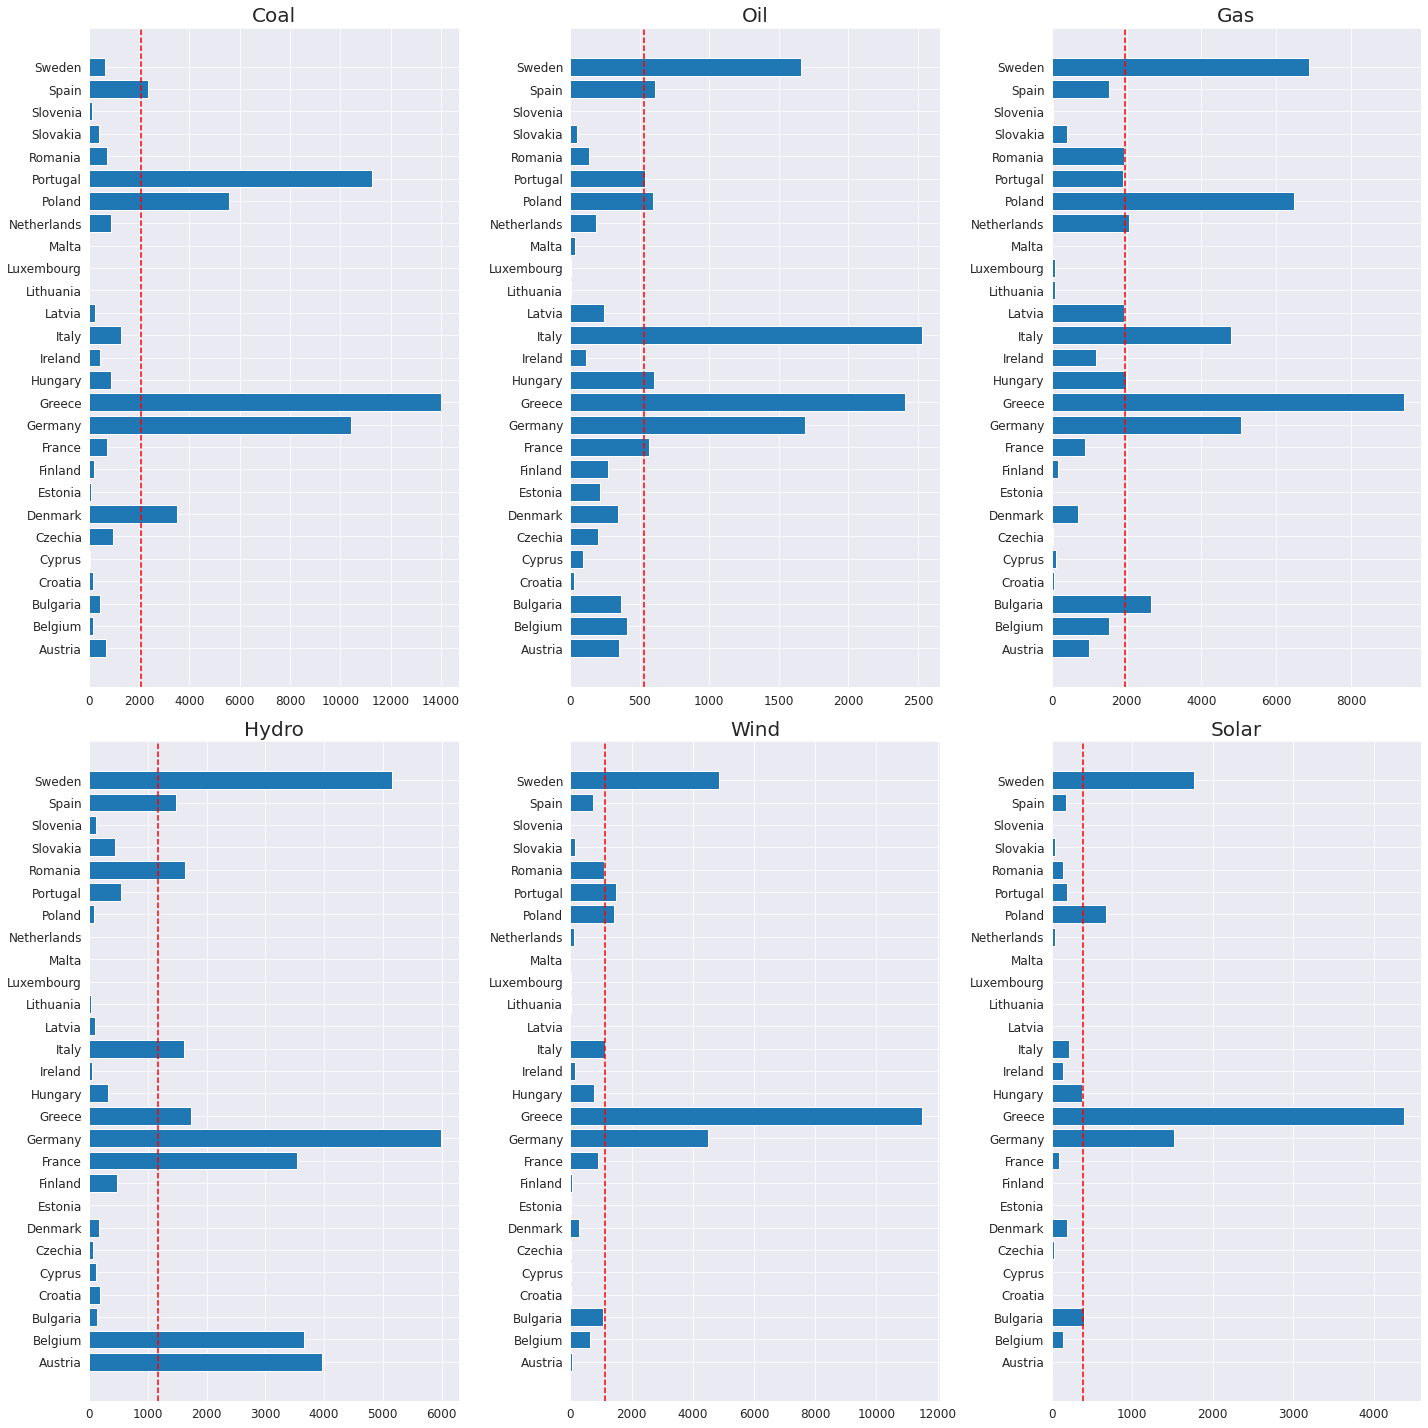

In [31]:
fig, ax = plt.subplots(2,3, figsize=(20,20))

#plots
ax[0,0].barh(total_country_study_df.country,total_country_study_df.coal_electricity)
ax[0,1].barh(total_country_study_df.country,total_country_study_df.oil_electricity)
ax[0,2].barh(total_country_study_df.country,total_country_study_df.gas_electricity)
ax[1,0].barh(total_country_study_df.country,total_country_study_df.hydro_electricity)
ax[1,1].barh(total_country_study_df.country,total_country_study_df.wind_electricity)
ax[1,2].barh(total_country_study_df.country,total_country_study_df.solar_electricity)

#plotting the titles for subplots:
ax[0,0].set_title('Coal',fontsize=20)
ax[0,1].set_title('Oil',fontsize=20)
ax[0,2].set_title('Gas',fontsize=20)
ax[1,0].set_title('Hydro',fontsize=20)
ax[1,1].set_title('Wind',fontsize=20)
ax[1,2].set_title('Solar',fontsize=20)

#calculating mean:
mean_coal = total_country_study_df['coal_electricity'].mean()
mean_oil = total_country_study_df['oil_electricity'].mean()
mean_gas = total_country_study_df['gas_electricity'].mean()
mean_hydro = total_country_study_df['hydro_electricity'].mean()
mean_wind = total_country_study_df['wind_electricity'].mean()
mean_solar = total_country_study_df['solar_electricity'].mean()


#plotting the mean lines for each subplot in red:
mean_coal_line = ax[0,0].axvline(mean_coal, color='r', linestyle='--')
mean_oil_line = ax[0,1].axvline(mean_oil, color='r', linestyle='--')
mean_gas_line = ax[0,2].axvline(mean_gas, color='r', linestyle='--')
mean_hydro_line = ax[1,0].axvline(mean_hydro, color='r', linestyle='--')
mean_wind_line = ax[1,1].axvline(mean_wind, color='r', linestyle='--')
mean_solar_line = ax[1,2].axvline(mean_solar, color='r', linestyle='--')

fig.tight_layout() 


>
>
###  Plot extracting the Nuclear energy consumption across various nations in the EU
>
>

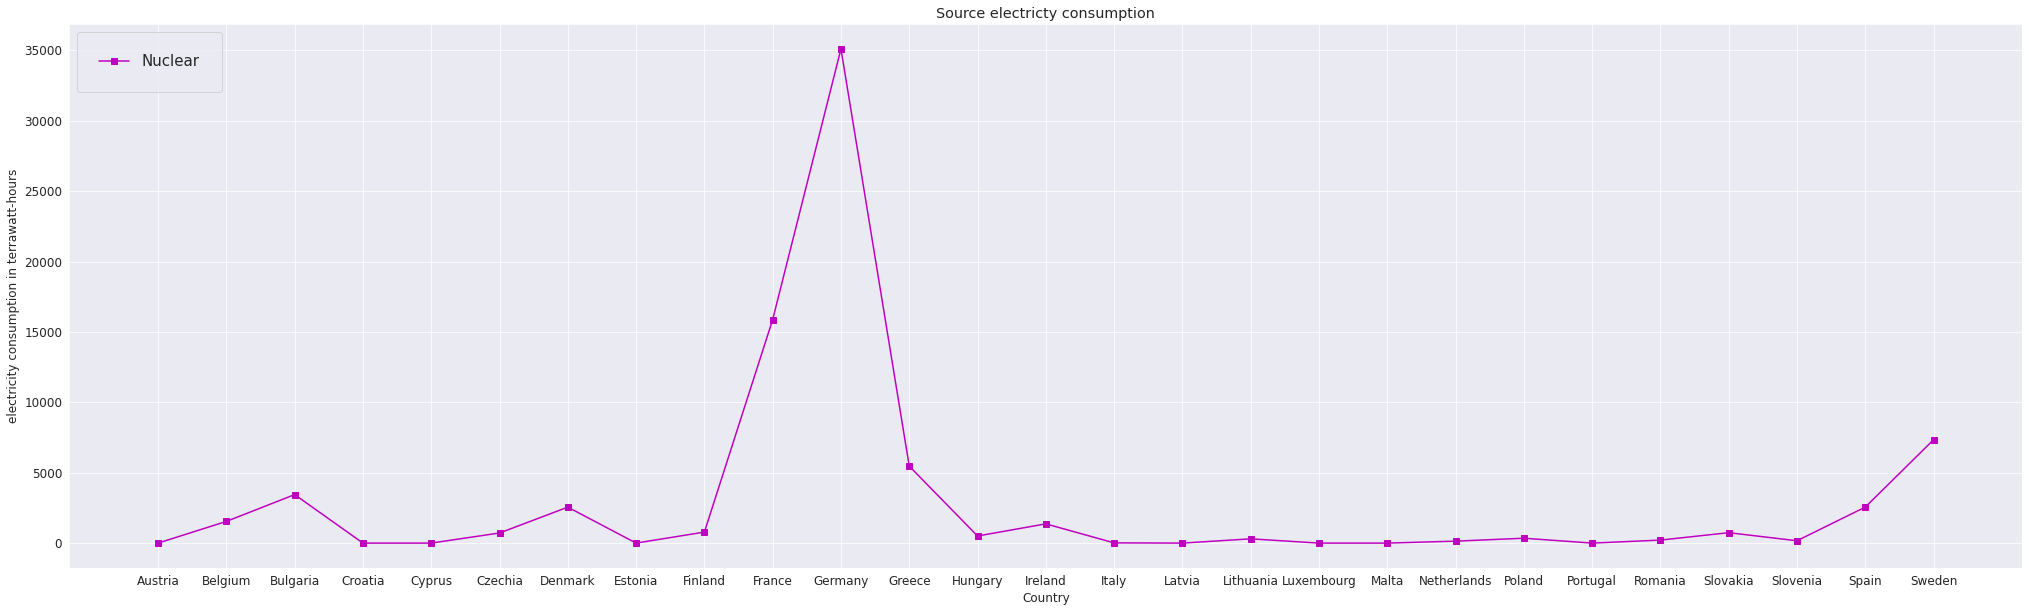

In [32]:
plt.plot(total_country_study_df.country, total_country_study_df.nuclear_electricity, 's-m')
plt.xlabel('Country')
plt.ylabel('electricity consumption in terrawatt-hours')

plt.title('Source electricty consumption')
plt.legend(['Nuclear'],loc='upper left', borderpad=1.5, labelspacing=2.5, prop={'size':15})

We can clearly see that Germany and France has been the major consumers of Nuclear energy on aggregate between the period provided in the dataset.

>
>
### Total Energy Consumption in EU between 2000-2020
>
>

In comparison to 2018, the gross available energy in the European Union declined somewhat in 2020. Despite a long-term squeeze, Natural Gas along with Coal products remained the most important energy source for the European economy, while witnessing a significant demand and growth in the consumption of wind energy source.

Oil (crude oil and petroleum products) continued to be the most significant energy source for the European economy, despite a long-term downward trend, while natural gas remained the second largest energy source. After a minor increase between 2014 and 2017, Natural gas consumption began to drop again, although natural gas consumption fluctuated, with levels rising again over the past couple years.


Renewable energy sources are steadily increasing their contribution, having already overtaken solid fossil fuels in 2018 and gaining pace in 2019.

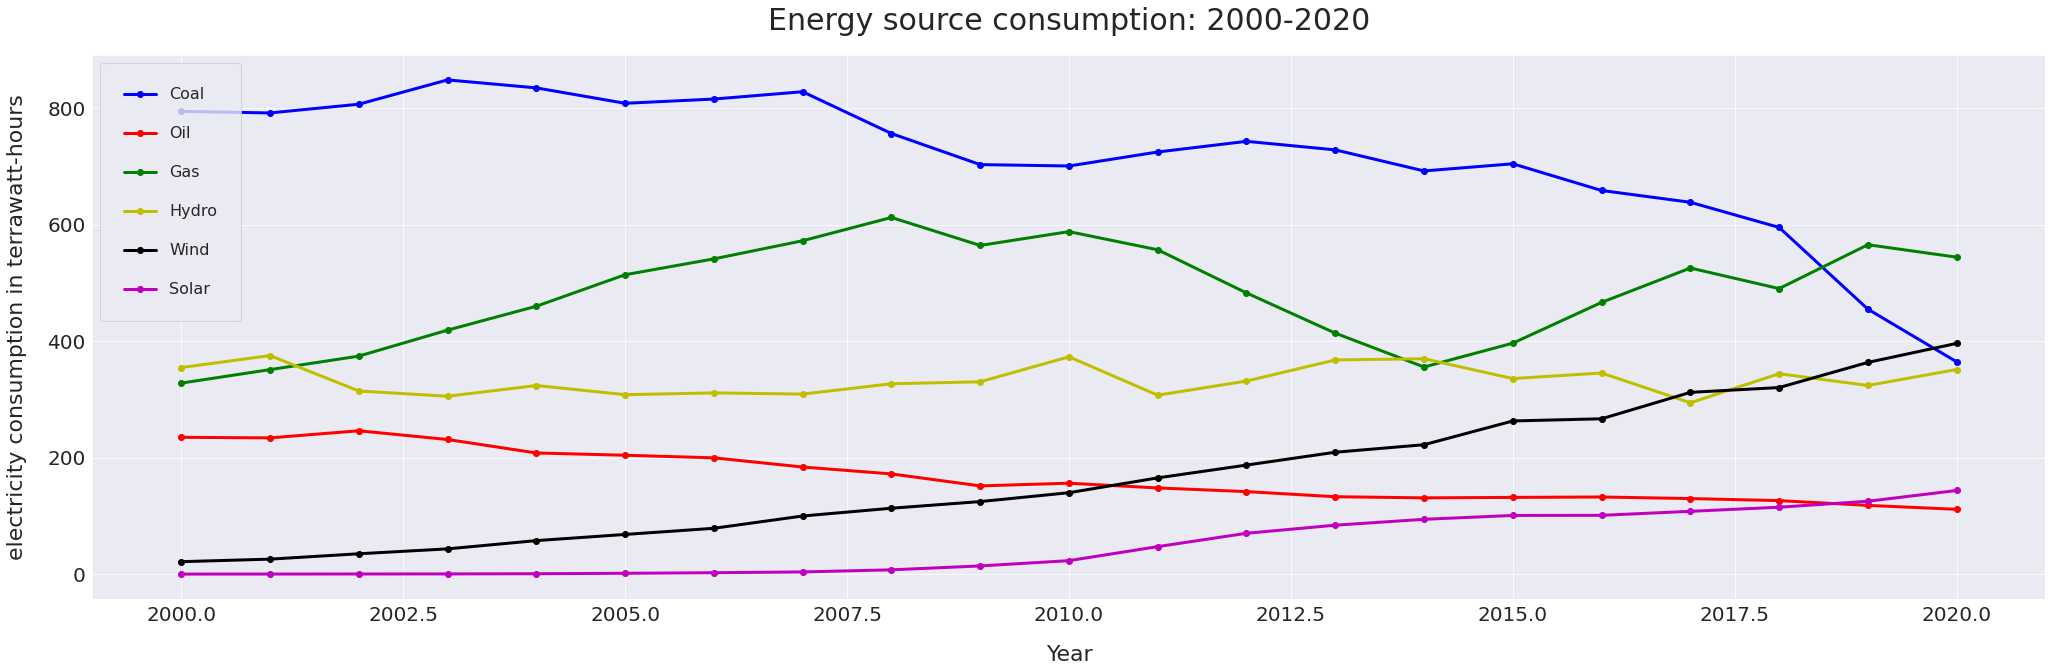

In [33]:

plt.plot(total_year_study_df.year, total_year_study_df.coal_electricity, 'o-b', linewidth=3)
plt.plot(total_year_study_df.year, total_year_study_df.oil_electricity, 'o-r',linewidth=3)
plt.plot(total_year_study_df.year, total_year_study_df.gas_electricity, 'o-g',linewidth=3)
plt.plot(total_year_study_df.year, total_year_study_df.hydro_electricity, 'o-y',linewidth=3)
plt.plot(total_year_study_df.year, total_year_study_df.wind_electricity, 'o-k',linewidth=3)
plt.plot(total_year_study_df.year, total_year_study_df.solar_electricity, 'o-m',linewidth=3)


plt.xlabel('Year',fontsize=22,labelpad=20)
plt.ylabel('electricity consumption in terrawatt-hours', fontsize=22, labelpad=20)

plt.title('Energy source consumption: 2000-2020', fontsize=30, pad=25)
plt.legend(['Coal','Oil','Gas','Hydro','Wind','Solar'],loc='upper left', borderpad=1.5, labelspacing=1.5, prop={'size':16})

plt.tick_params(axis = 'both', which = 'major', labelsize = 20)


>
>
### Energy Source Distribution across EU nations 2000-2020
>
>

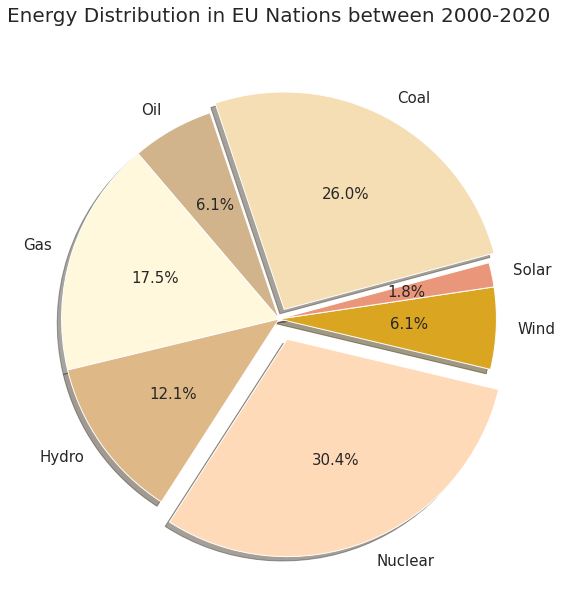

In [66]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 20.0

energy_distribution_eu = total_year_study_df[total_year_study_df.columns[1:]].sum()

my_labels= 'Coal','Oil','Gas','Hydro','Nuclear','Wind','Solar'
listed_labels = list(my_labels)

my_colors = ['wheat','tan','cornsilk','burlywood','peachpuff','goldenrod','darksalmon']
my_explode = (0.05, 0, 0, 0, 0.1, 0, 0)

plt.pie(energy_distribution_eu, labels=listed_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode= my_explode, textprops={'fontsize': 15})
plt.title('Energy Distribution in EU Nations between 2000-2020', fontsize=20, pad=25)
#plt.axis('equal')


plt.show()


>
With Nuclear, Coal and Natural Gas dominating the energy consumption in the over EU market, a closer analysis on the data has been conducted to study the major consumers:
>
A comparison pie chart of major consumers for each major energy source between the period of 2000-2020 extracted below:

In [125]:
#Extracting the Top 5 Countries depending on Nuclear Energy Source:
nuclear_df = energy_df.groupby('country')[['country','nuclear_electricity']].sum().reset_index()
nuclear_df[nuclear_df.columns[0:]].sort_values(['nuclear_electricity'], ascending=[False]).iloc[:-22 , :]
nuclear_data = nuclear_df[nuclear_df.columns[0:]]
nuc_df= nuclear_data.sort_values(['nuclear_electricity'], ascending=[False]).iloc[:-22 , :]

#Extracting the Top 5 Countries depending on Natural Gas Energy Source:
gas_df = energy_df.groupby('country')[['country','gas_electricity']].sum().reset_index()
gas_df[gas_df.columns[0:]].sort_values(['gas_electricity'], ascending=[False]).iloc[:-22 , :]
gas_data = gas_df[gas_df.columns[0:]]
ga_df= gas_data.sort_values(['gas_electricity'], ascending=[False]).iloc[:-22 , :]

#Extracting the Top 5 Countries depending on Coal Energy Source:
coal_df = energy_df.groupby('country')[['country','coal_electricity']].sum().reset_index()
coal_df[coal_df.columns[0:]].sort_values(['coal_electricity'], ascending=[False]).iloc[:-22 , :]
coal_data = coal_df[coal_df.columns[0:]]
co_df= coal_data.sort_values(['coal_electricity'], ascending=[False]).iloc[:-22 , :]


In [126]:
co_df

,country,coal_electricity
11,Greece,14006.567
21,Portugal,11246.701
10,Germany,10425.403
20,Poland,5585.563
6,Denmark,3502.571


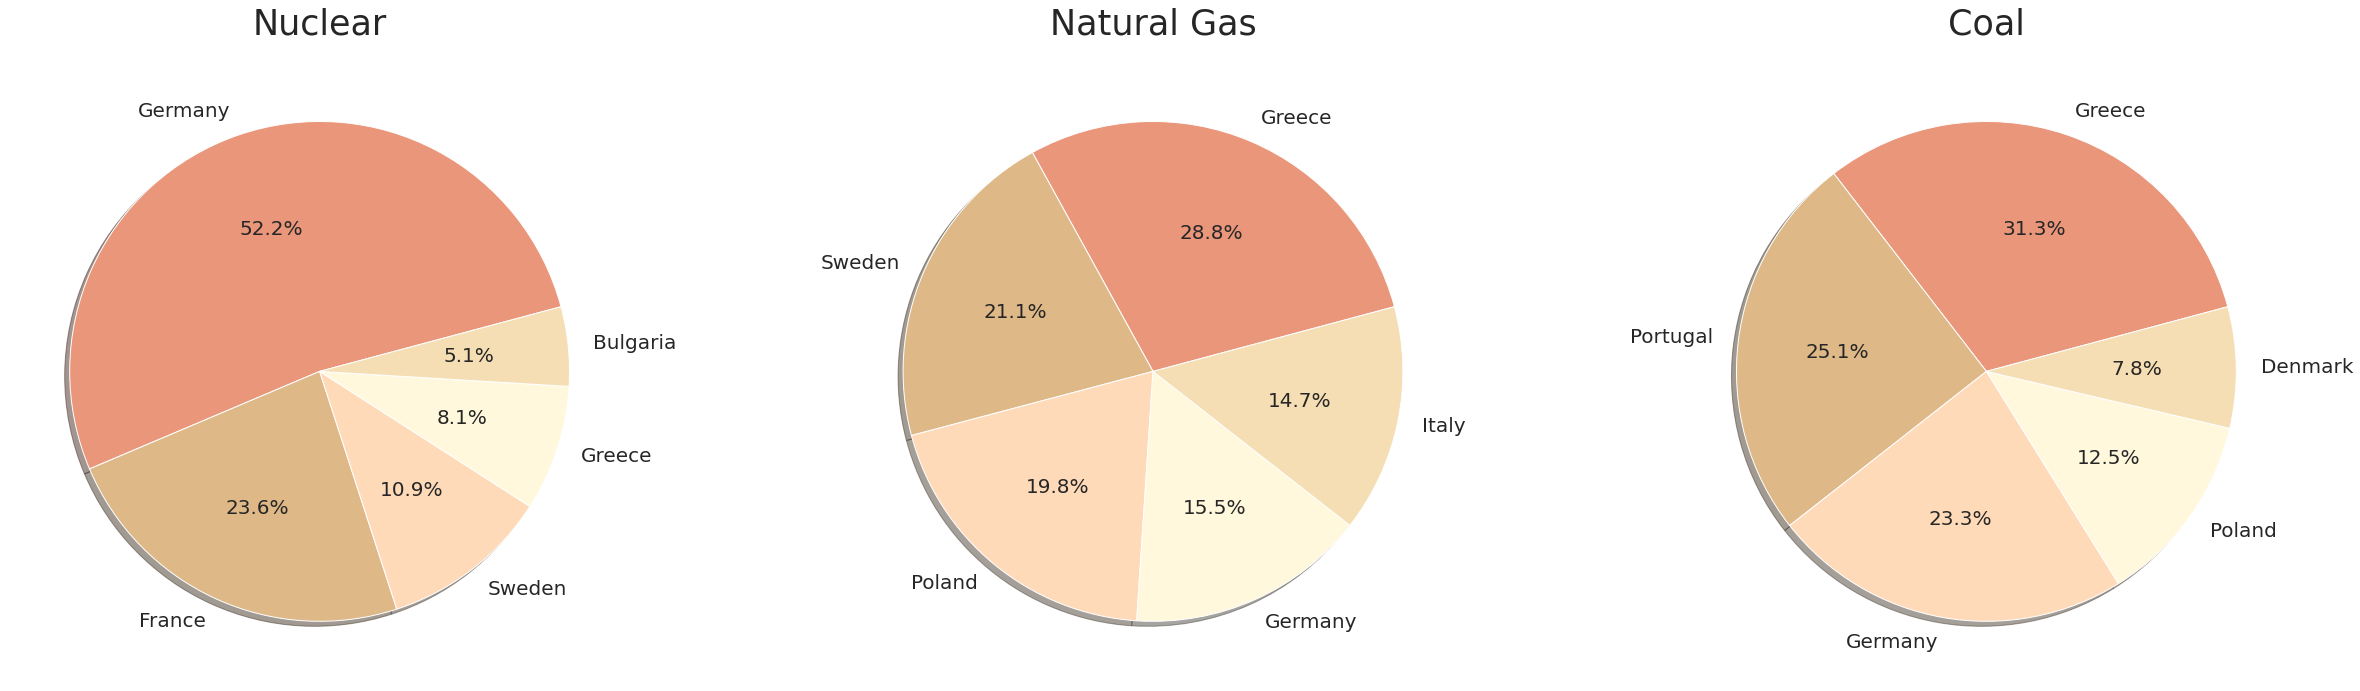

In [128]:
import matplotlib as mpl
#matplotlib.pyplot.subplot(nrows, ncolumns, index)
mpl.rcParams['font.size'] = 20.0

#fig, ax = plt.subplots(1,3,1, figsize=(20,20))

plt.subplot(1, 3, 1)
nuclear= nuc_df['nuclear_electricity'].values
my_labels= nuc_df['country'].values
listed_labels = list(my_labels)
my_colors = ['darksalmon','burlywood','peachpuff','cornsilk','wheat']
my_explode = (0.0, 0, 0, 0, 0)
plt.pie(nuclear, labels=listed_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode= my_explode, textprops={'fontsize': 20})
plt.title('Nuclear', fontsize=35, pad=25)


plt.subplot(1,3,2)
gas= ga_df['gas_electricity'].values
my_labels= ga_df['country'].values
listed_labels = list(my_labels)
my_colors = ['darksalmon','burlywood','peachpuff','cornsilk','wheat']
my_explode = (0.0, 0, 0, 0, 0)
plt.pie(gas, labels=listed_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode= my_explode, textprops={'fontsize': 20})
plt.title('Natural Gas', fontsize=35, pad=25)


plt.subplot(1,3,3)
coal= co_df['coal_electricity'].values
my_labels= co_df['country'].values
listed_labels = list(my_labels)
my_colors = ['darksalmon','burlywood','peachpuff','cornsilk','wheat']
my_explode = (0.0, 0, 0, 0, 0)
plt.pie(coal, labels=listed_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode= my_explode, textprops={'fontsize': 20})
plt.title('Coal', fontsize=35, pad=25)


#ax[0,0].plt.title('Energy Distribution Share in EU Nations between 2000-2020', fontsize=25, pad=25)
#plt.axis('equal')

plt.tight_layout()
plt.show()


Among the European countries, primary Nuclear energy consumption was highest in **Germany** in 2020. This was followed by **France** and **Sweden**. Primary energy is energy taken directly from natural resources such as crude oil, coal and wind. This means primary energy can be either non-renewable or renewable. **Greece** remains the major consumer for Natural gas and coal among the European nations.
>

Let us save and upload our work to Jovian before continuing

In [78]:
import jovian


In [135]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ranton95/energy-consumption-europe-eda" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ranton95/energy-consumption-europe-eda


'https://jovian.ai/ranton95/energy-consumption-europe-eda'

## Asking and Answering Questions

(The below questions and aswers are part of the project submission for jovian course. You can skip this part)

>

The factors that contribute to rising energy usage are numerous. Since 2014, economic growth has been stronger than it has been since before the Great Financial Crisis, putting upward pressure on consumption in the manufacturing, service, and transportation sectors; end-user energy prices have fallen, particularly in the transportation sector, contributing to an increase in passenger travel; progressively colder winter temperatures have pushed up residential and service sector consumption; and decomposition analysis suggests that energy efficieny has increased.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: Is there growth in the Solar Energy Source?

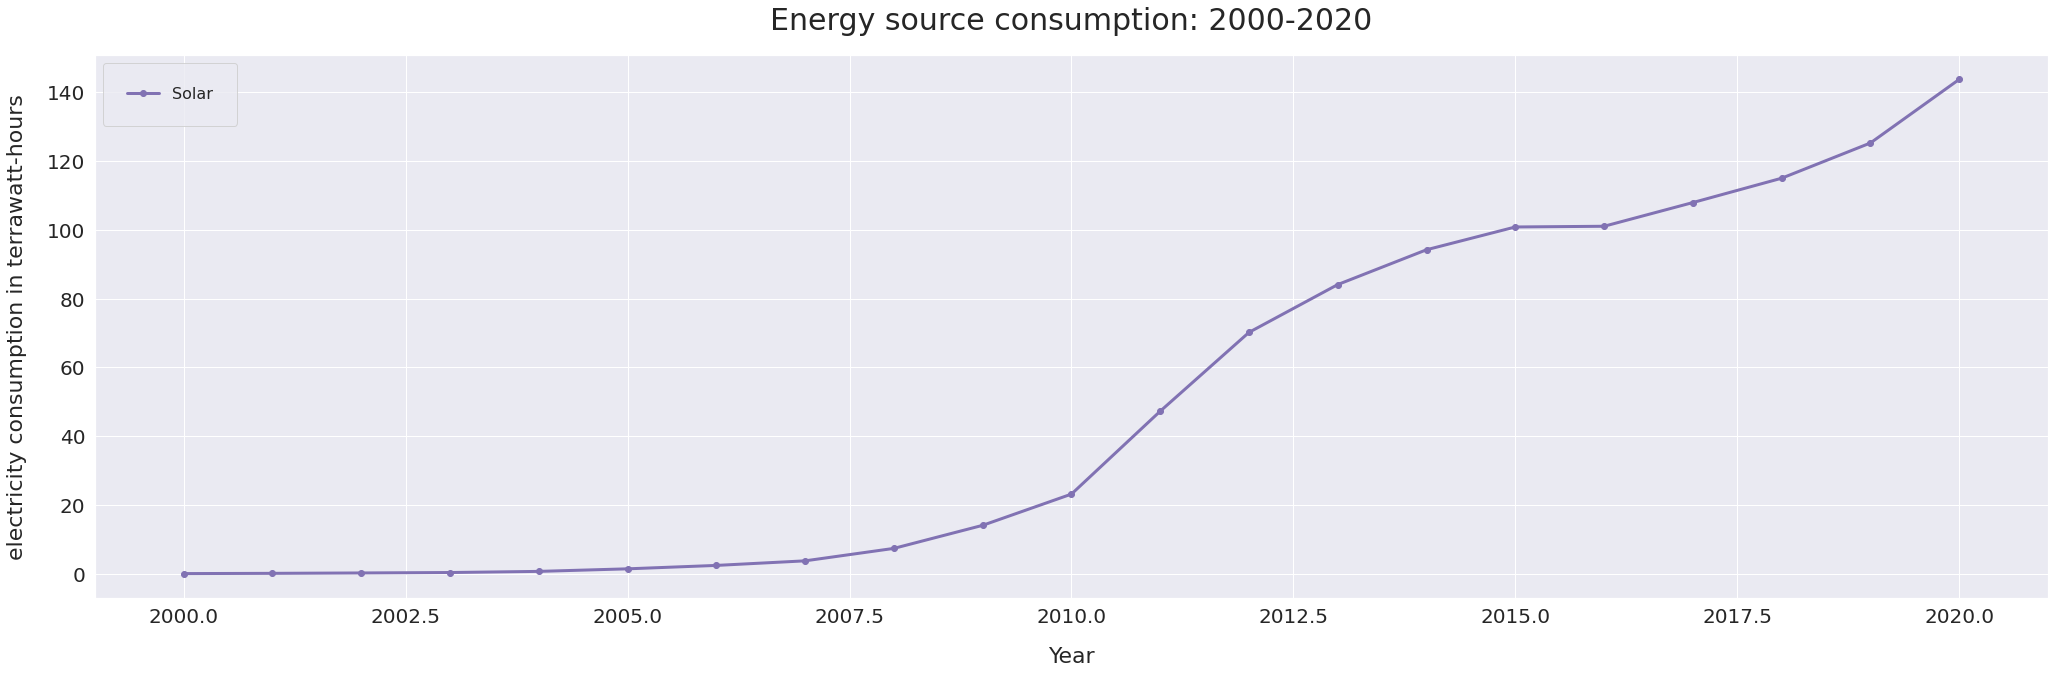

In [101]:
plt.plot(total_year_study_df.year, total_year_study_df.solar_electricity, 'o-m',linewidth=3)


plt.xlabel('Year',fontsize=22,labelpad=20)
plt.ylabel('electricity consumption in terrawatt-hours', fontsize=22, labelpad=20)

plt.title('Energy source consumption: 2000-2020', fontsize=30, pad=25)
plt.legend(['Solar'],loc='upper left', borderpad=1.5, labelspacing=1.5, prop={'size':16})

plt.tick_params(axis = 'both', which = 'major', labelsize = 20)


The overall trend in the consumption of solar energy over the past decade has seen significant growth.

#### Q2: Who is currently leading consumer in Coal sector?

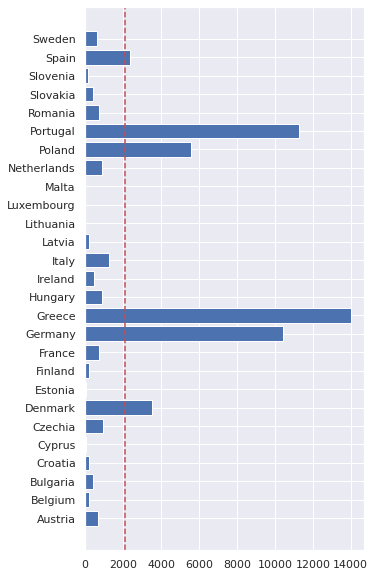

In [99]:
#fig, ax = plt.subplots(2,3, figsize=(20,20))

fig = plt.figure(figsize=(5,10))
#plots
plt.barh(total_country_study_df.country,total_country_study_df.coal_electricity)

#plotting the titles for subplots:

ax[1,2].set_title('Coal',fontsize=20)

#calculating mean:
mean_solar = total_country_study_df['coal_electricity'].mean()


#plotting the mean lines for each subplot in red:
mean_solar_line = plt.axvline(mean_solar, color='r', linestyle='--')



Given its ample sun and wind, [Greece is a green energy laggard in Europe](https://www.aljazeera.com/news/2021/12/7/better-late-then-never-greece-amps-up-renewable-energy#:~:text=Turning%20to%20face%20the%20sun,EU%20average%20of%2034%20percent.) Greece's situation is amplified by the fact that its principal energy producer, the Public Power Corporation (PPC), has battled tooth and claw for the past two decades to keep coal as the country's primary energy source. This left the development of renewable energy and natural gas exclusively in the hands of private companies.

#### Q3: What can we tell about the impact of Coal consumption across Europe?

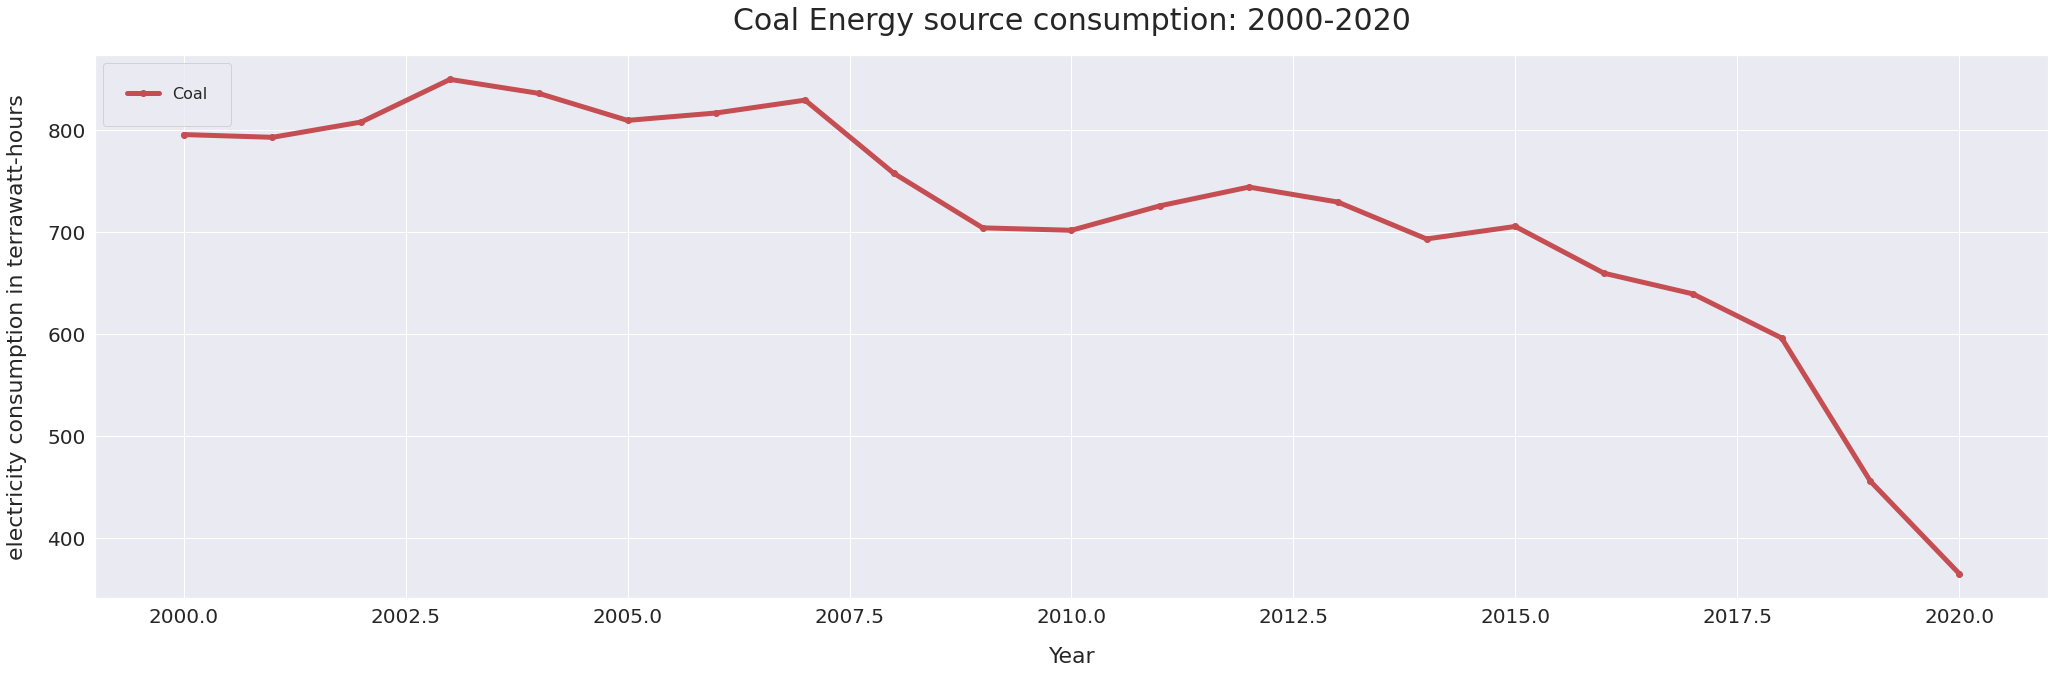

In [103]:
plt.plot(total_year_study_df.year, total_year_study_df.coal_electricity, 'o-r',linewidth=5)


plt.xlabel('Year',fontsize=22,labelpad=20)
plt.ylabel('electricity consumption in terrawatt-hours', fontsize=22, labelpad=20)

plt.title('Coal Energy source consumption: 2000-2020', fontsize=30, pad=25)
plt.legend(['Coal'],loc='upper left', borderpad=1.5, labelspacing=1.5, prop={'size':16})

plt.tick_params(axis = 'both', which = 'major', labelsize = 20)


The overall consumption of Caol energy in Europe over the past 20 years has been in decline. Specially as the virus spread around the world, industrial demand for coal fell sharply.

[The International Energy Agency’s Global Energy Review 2021](https://www.iea.org/reports/global-energy-review-2021/coal) found that worldwide use of coal fell by 4% in 2020 – the biggest drop since World War II.

#### Q4: Display the top 5 nations with highest population:

In [116]:
top_df = pop_gdp_df.groupby('country')[['country','population']].sum().reset_index()
top_df[top_df.columns[0:]].sort_values(['population'], ascending=[False]).iloc[:-22 , :]
top_data = top_df[top_df.columns[0:]]
to_df= top_data.sort_values(['population'], ascending=[False]).iloc[:-22 , :]
to_df

,country,population
10,Germany,8.846207e+09
9,France,5.922223e+09
14,Italy,5.916009e+09
25,Spain,3.833967e+09
20,Poland,3.806995e+09


#### Q5: Display the top 5 consumers of Hydro Electricity:

Text(0.5, 1.0, 'Top Consumers of Hydro Electricity')

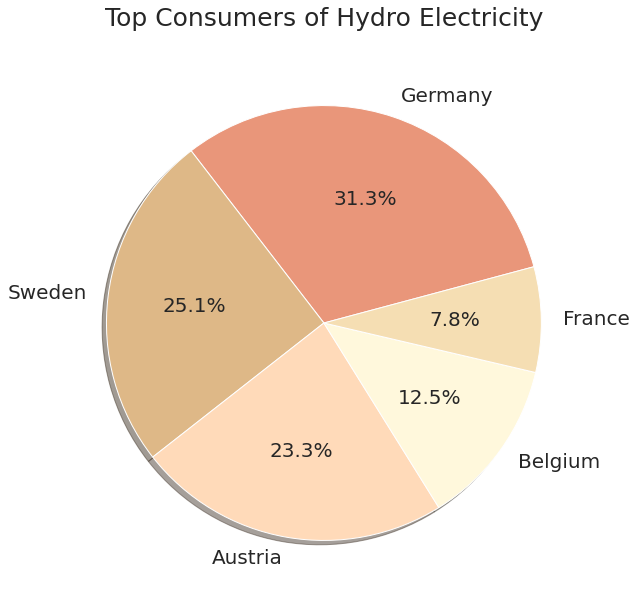

In [140]:
Hydro_df = energy_df.groupby('country')[['country','hydro_electricity']].sum().reset_index()
hydro_df[hydro_df.columns[0:]].sort_values(['hydro_electricity'], ascending=[False]).iloc[:-22 , :]
hydro_data = hydro_df[hydro_df.columns[0:]]
hy_df= hydro_data.sort_values(['hydro_electricity'], ascending=[False]).iloc[:-22 , :]

hydro = hy_df['hydro_electricity'].values
my_labels= hy_df['country'].values
listed_labels = list(my_labels)
my_colors = ['darksalmon','burlywood','peachpuff','cornsilk','wheat']
my_explode = (0.0, 0, 0, 0, 0)
plt.pie(coal, labels=listed_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode= my_explode, textprops={'fontsize': 20})
plt.title('Top Consumers of Hydro Electricity', fontsize=25, pad=25)


Germany and Sweden together consumes more than half of the Hydro Electricity in the EU.

Let us save and upload our work to Jovian before continuing.

In [117]:
import jovian

In [141]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ranton95/energy-consumption-europe-eda" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ranton95/energy-consumption-europe-eda


'https://jovian.ai/ranton95/energy-consumption-europe-eda'

## Inferences and Conclusion

Overall we can notice the significant demand in renewable energy sources. Solar energy has been experiencing a significant demand specially in the past decade, which shows a positive increasing demand. As a renewable energy source, the only limitation of solar power is our ability to turn it into electricity in an efficient and cost-effective way.

In [138]:
import jovian

In [139]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ranton95/energy-consumption-europe-eda" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ranton95/energy-consumption-europe-eda


'https://jovian.ai/ranton95/energy-consumption-europe-eda'

## References and Future Work

 Since this is a large dataset, I would like to work on this during the weekends in the coming week. This would be the 1st week implementation for the zero to pandas session and course. Using everything I have learned over the past week.

In [133]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>